(RM04)=
# RM04

Consider the following constrained optimization problem:

$$
\begin{array}{lll}
\textrm{minimize}   & f(x_1, x_2) &:= e^{3x_1} + e^{-4x_2} \\
\textrm{subject to} & h(x_1, x_2) &:= x_1^{2} + x_2^{2} - 1 = 0.
\end{array}
$$

The corresponding Lagrangian is:

$$
L(x_1,x_2,\mu) = e^{3x_1} + e^{-4x_2} + \mu (x_1^{2} + x_2^{2} - 1)
$$

and the KKT optimality conditions:

$$
\begin{aligned}
\nabla_{x_1} L(x_1,x_2,\mu) &:=& 3e^{3x_1} + 2\mu x_1 &= 0, \\
\nabla_{x_2} L(x_1,x_2,\mu) &:=& -4e^{-4x_2} + 2\mu x_2 &= 0, \\
h(x) = \nabla_{\mu} L(x_1,x_2,\mu) &:=& x_1^{2} + x_2^{2} - 1 &= 0.
\end{aligned}
$$

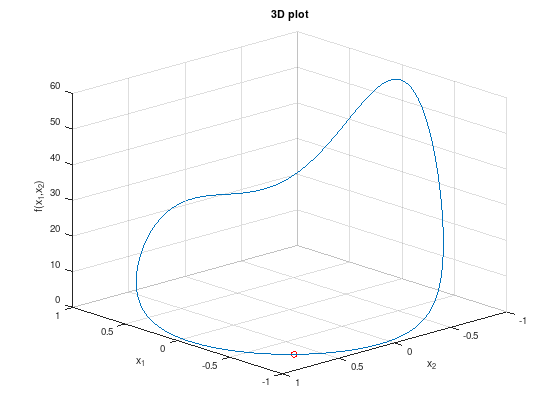

In [1]:
% Optimal point.
px = -0.75;
py = 0.66;

theta = 0:0.02:2*pi;
x = cos (theta);
y = sin (theta);
z = exp (3*x) + exp (-4*y);
plot3 (x,y,z);
hold on;
plot3 (px, py, exp (3*px) + exp (-4*py), 'ro');
xlabel ('x_1');
ylabel ('x_2');
zlabel ('f(x_1,x_2)');
title ('3D plot');
grid on;
view (-133, 23);

## Sequential Quadratic Programming (SQP)

Formulate the KKT optimality conditions
of the quadratic sub-problem {eq}`SQP_sub_problem` in matrix form,
which correspond to the following non-linear system of equations:

$$
\begin{pmatrix}
Q & B^{T} \\
B & 0
\end{pmatrix}
\begin{pmatrix} \Delta x \\ \Delta \mu \end{pmatrix}
= -\begin{pmatrix} \nabla_{x} L(x,\mu) \\ h(x) \end{pmatrix},
$$

with $B = \nabla^{T} h(x) = (2 x_1, 2 x_2)$ and $Q = \nabla^{2}_{x,x} L(x,\mu) = $
$\begin{pmatrix} 9e^{3x_1} + 2\mu & 0 \\ 0 & 16e^{-4x_2} + 2\mu \end{pmatrix}$.

For the starting point
$\mathbf{x_{0}} = (x_{0}, y_{0}, \mu_{0})^{T} = (-1, 1, 1)^{T}$
the linear system to solve to compute the first Newton correction is:

$$
\begin{pmatrix}
2.44808 &       0 & -2 \\
      0 & 2.29305 &  2 \\
     -2 &       2 &  0
\end{pmatrix}
\begin{pmatrix} \Delta x \\ \Delta y \\ \Delta \mu \end{pmatrix}
= \begin{pmatrix} 1.8506 \\ -1.9267 \\ -1 \end{pmatrix}
$$

## Numerical experiment

In [2]:
format shortE

f = @(x) exp(3*x(1)) + exp(-4*x(2));
h = @(x) x(1)^2 + x(2)^2 - 1;

% Lagrange multiplier is x(3).

grad_L = @(x) [ 3*exp( 3*x(1)) + 2*x(3)*x(1);
               -4*exp(-4*x(2)) + 2*x(3)*x(2)];

B = @(x) 2 * [x(1), x(2)];

Q = @(x) [9*exp(3*x(1)) + 2*x(3), 0;
          0, 16*exp(-4*x(2))+ 2*x(3)];

% Initial values.
x0 = [-1, 1, 1]';
disp('             x_k               mu_k      ||grad_x L||     ||h||')
disp([x0', norm(grad_L(x0)), norm(h(x0))])

% Newton's method, SQP iteration.
x = x0;
for i = 1:5
  A = [ Q(x), B(x)'; ...
        B(x),    0   ];
  b = [-grad_L(x); -h(x)];
  x = x + A \ b;
  disp([x', norm(grad_L(x)), norm(h(x))])
end

             x_k               mu_k      ||grad_x L||     ||h||
  -1.0000e+00   1.0000e+00   1.0000e+00   2.6716e+00   1.0000e+00
  -7.7423e-01   7.2577e-01   3.5104e-01   3.8268e-01   1.2617e-01
  -7.4865e-01   6.6614e-01   2.1606e-01   1.1101e-02   4.2107e-03
  -7.4834e-01   6.6332e-01   2.1232e-01   3.9448e-06   8.0212e-06
  -7.4834e-01   6.6332e-01   2.1232e-01   3.1054e-11   1.6306e-11
  -7.4834e-01   6.6332e-01   2.1232e-01   1.2413e-16            0
